In [178]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import math
from more_itertools import consecutive_groups
from operator import itemgetter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
warnings.filterwarnings('ignore')

In [179]:
def ma(array, window=1):  # Moving average
    return np.convolve(array[0], np.ones((1,window))[0]/window, mode='same').reshape(1,array.shape[1])

In [180]:
np.random.seed(41)

t=np.linspace(0,120,121)

freq=1/4

scale=(t/20)*np.random.uniform(low=0.0, high=1.0, size=len(t))*abs(np.cos(t))+0.1

ts_trend=-0.00005*(3*t-40)**2.2+5
ts_trend=0.00005*((t-50)**3-(t-50)**2-1000*(t-50))
time_series=scale*np.sin(2*np.pi*freq*t)+ts_trend
time_series[105:]=0
time_series[21]=0
time_series[43:53]=-3.5 #time_series[42]

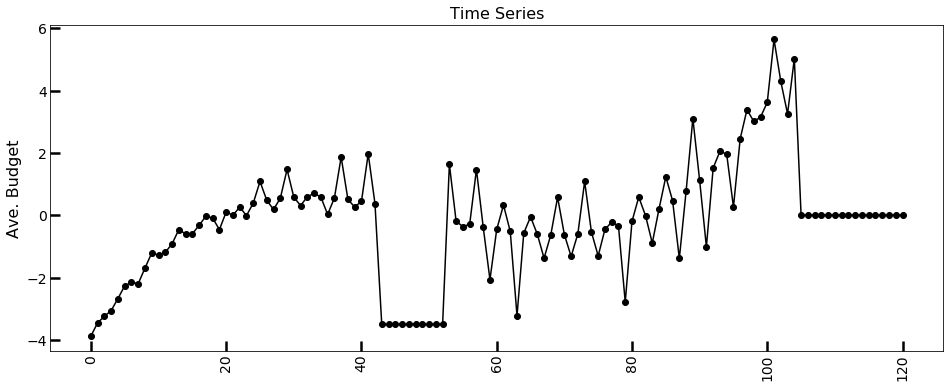

In [181]:
plt.figure(figsize=(16,6))
plt.cla()
plt.plot(t, time_series,'k-o')
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time Series', fontsize=16);

In [182]:
avg=ma(array=time_series.reshape(1,-1),window=12)

In [183]:
decomposed=seasonal_decompose(time_series, freq=4)
trend=decomposed.trend.reshape(1,-1)
for i in range(0,trend.shape[0]):
    if ~np.isnan(trend[0][i]):
        indexx=i
        break

trend[0][0:indexx]=trend[0][indexx]

trend=np.fliplr(trend)

for i in range(0,trend.shape[0]):
    if ~np.isnan(trend[0][i]):
        indexx=i
        break

trend[0][0:indexx]=trend[0][indexx]

trend=np.fliplr(trend)

In [187]:
trend=trend.reshape(-1,)

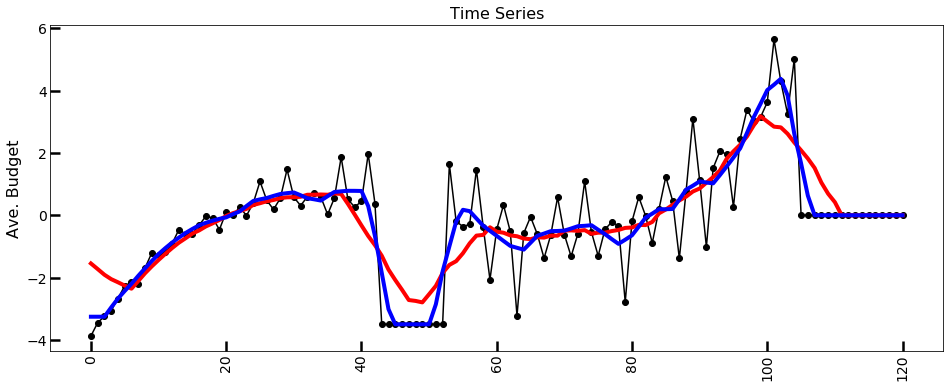

In [188]:
plt.figure(figsize=(16,6))
plt.cla()
plt.plot(t, time_series,'k-o')
plt.plot(t, avg[0],'r', LineWidth=4)
plt.plot(t, trend,'b', LineWidth=4)
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time Series', fontsize=16);

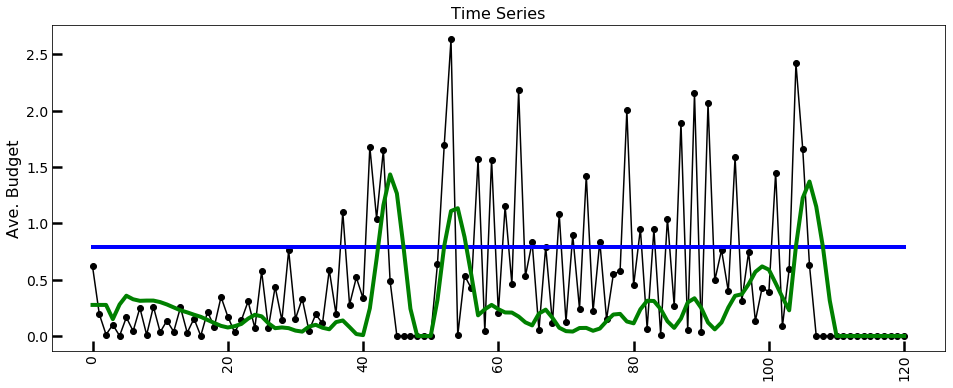

In [204]:
residual=time_series-trend
std=residual.std()
s=pd.Series(trend)
ss=s.rolling(4).std()
ss.fillna(value=ss.mean(), inplace=True)
ss=np.array(ss)

plt.figure(figsize=(16,6))
plt.cla()
plt.plot(t, abs(residual),'k-o')
plt.plot([0,120],[std, std], 'b', LineWidth=4)
plt.plot(t, ss,'g', LineWidth=4)
#plt.plot(t, avg[0],'r', LineWidth=4)
#plt.plot(t, decomposed.trend,'b', LineWidth=4)
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time Series', fontsize=16);

In [142]:
np.isnan(trend[0])

True

In [139]:
type(trend[0])

numpy.float64

In [140]:
type(np.nan)

float

In [200]:
s=pd.Series(trend)
ss=s.rolling(4).std()
ss.fillna(value=ss.mean(), inplace=True)
ss=np.array(ss)

In [202]:
ss=np.array(ss)

array([0.27577018, 0.27577018, 0.27577018, 0.14931114, 0.27975114,
       0.35742641, 0.32585561, 0.31218644, 0.31430534, 0.31425689,
       0.30088301, 0.27963331, 0.2536841 , 0.22789563, 0.2095544 ,
       0.18890693, 0.17004059, 0.14254667, 0.11514284, 0.08955491,
       0.07527845, 0.08675437, 0.10671504, 0.15406688, 0.18816534,
       0.17417874, 0.11295132, 0.06924374, 0.07566355, 0.06933097,
       0.04783634, 0.03866096, 0.08314696, 0.09917304, 0.07303245,
       0.05955996, 0.12314258, 0.13768913, 0.07887538, 0.01720363,
       0.00754113, 0.24518433, 0.68498948, 1.15988611, 1.43465513,
       1.26512404, 0.77925136, 0.24195   , 0.        , 0.        ,
       0.        , 0.32089686, 0.80059494, 1.10926376, 1.13438625,
       0.87891198, 0.54345194, 0.18338489, 0.23686258, 0.27599199,
       0.23780478, 0.20884646, 0.20782905, 0.17232561, 0.12070692,
       0.09408038, 0.19889917, 0.23381587, 0.16102117, 0.07313308,
       0.04284288, 0.03917858, 0.07064868, 0.07161622, 0.04622